# Logistic Regression Assignment

In [1]:
##Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Importing data

df=pd.read_csv(r"C:\Users\Dell\Desktop\Datasets\titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
## Knowing our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [4]:
##Summarising Data

df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


<AxesSubplot:xlabel='Sex', ylabel='count'>

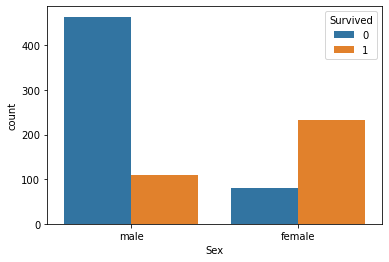

In [5]:
## Countplot for visualing male and female survivals 

sns.countplot(x ='Sex', hue = "Survived", data = df)

In [6]:
## Checking null values

df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

<AxesSubplot:>

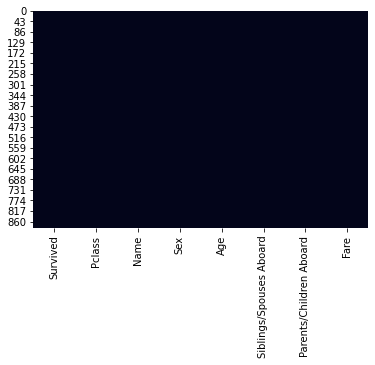

In [7]:
## Plotting null values

sns.heatmap(df.isnull(), cbar=False)

In [8]:
## Here we cannot see any white spaces in between, the plot implies we dont have any null values.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

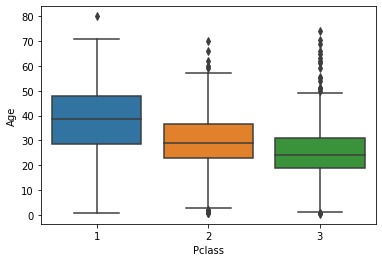

In [9]:
##Box-plot for visualising Age of people Pclass-wise

sns.boxplot(x="Pclass", y="Age", data=df)

In [10]:
## Here the boxplot represnts that the passengers of Pclass 1 had greater median age than passengers of Pclass 2 and Pclass 3.

In [11]:
## Getting Dummy variables for Sex and Pclass

sex=pd.get_dummies(df['Sex'],drop_first=True)
pcls=pd.get_dummies(df['Pclass'],drop_first=True)

In [12]:
## Rearranging the dataframe adding the columns with dummy variables and dropping extra columns like Pclass,Name and Sex.

titanic=pd.concat([df,sex,pcls],axis=1)
titanic.drop(['Pclass','Name','Sex'],axis=1,inplace=True)
titanic.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


In [13]:
## x = features/Independent variables and y = response/dependent

x=titanic.drop(['Survived'],axis=1)
y=titanic.iloc[:,0]

In [14]:
## Scaling features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
X=pd.DataFrame(scaler.transform(x),columns=x.columns)
X.head()

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,-0.529366,0.429904,-0.474981,-0.503586,0.740266,-0.511601,0.906287
1,0.604265,0.429904,-0.474981,0.783412,-1.350867,-0.511601,-1.103404
2,-0.245958,-0.475856,-0.474981,-0.490020,-1.350867,-0.511601,0.906287
3,0.391709,0.429904,-0.474981,0.417948,-1.350867,-0.511601,-1.103404
4,0.391709,-0.475856,-0.474981,-0.487507,0.740266,-0.511601,0.906287


In [15]:
## Splitting data in train and test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(620, 7)
(267, 7)
(620,)
(267,)


In [16]:
## Fitting Logistic Regression 

from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [17]:
## Predicting values for test data

y_predict=logmodel.predict(x_test)
y_predict

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1], dtype=int64)

In [18]:
## Evaluation using Classification_report

from sklearn.metrics import classification_report
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       0.82      0.80      0.81       162\n           1       0.70      0.72      0.71       105\n\n    accuracy                           0.77       267\n   macro avg       0.76      0.76      0.76       267\nweighted avg       0.77      0.77      0.77       267\n'

In [19]:
## Confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[130,  32],
       [ 29,  76]], dtype=int64)

In [20]:
## Finding Accuracy 

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.7715355805243446

In [21]:
## Displays Probablity for death and alive.

y_probs=pd.DataFrame(logmodel.predict_proba(x_test),columns=['death','alive'])
y_probs

,death,alive
0,0.944570,0.055430
1,0.214695,0.785305
2,0.519426,0.480574
3,0.201979,0.798021
4,0.456733,0.543267
...,...,...
262,0.367227,0.632773
263,0.131973,0.868027
264,0.905485,0.094515
265,0.857001,0.142999


In [22]:
## Here, the dataframe represents probability the the person is dead or alive. In first row the probability of 'death' is  
## 0.944570 which is greater than 'alive' probability implying that the person is dead. Thus our model predicts the outcome to 
## be zeo in this case.